# Obesity Levels Research Project
## AAI 500 - Fall 2024

### Researchers

    Bosky Atani
    Dean P. Simmer

In [6]:
import pandas as pd

# load the data file
obesity_file_path = "data/ObesityDataSet_raw_and_data_sinthetic.csv"
obesity = pd.read_csv(obesity_file_path , sep=",")
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


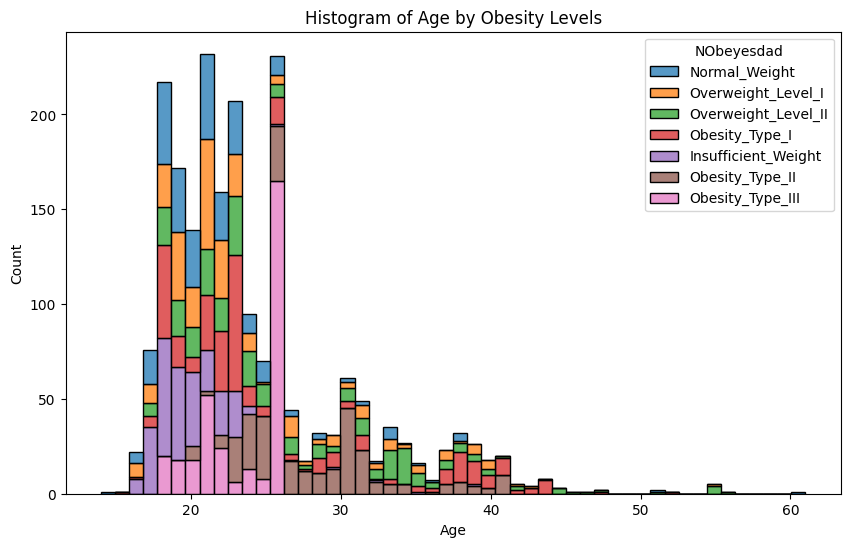

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=obesity, x='Age', hue='NObeyesdad', multiple='stack', kde=False)

# Add labels and title for histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Obesity Levels')
plt.show()

In [9]:
# Summarize mean age and standard deviation
print(obesity[['Age', 'Weight', 'Height']].describe().round(2))

           Age   Weight   Height
count  2111.00  2111.00  2111.00
mean     24.31    86.59     1.70
std       6.35    26.19     0.09
min      14.00    39.00     1.45
25%      19.95    65.47     1.63
50%      22.78    83.00     1.70
75%      26.00   107.43     1.77
max      61.00   173.00     1.98


Sample size is 2111

Age Distribution is right skewed

Mean age is 24.21 and median at 22.78.

The population dataset is mostly younger individuals

Mean weight is 86.59kg, std of 27.19.

In [11]:
# Create a dictionary with obesity categories and corresponding ranges
obesity_data = {
    'Category': ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'Weight Range': ['Less than 18.5', '18.5 to 24.9', '25.0 to 29.9', '30.0 to 34.9', '35.0 to 39.9', 'Higher than 40']
}

# Convert dictionary to DataFrame
obesity_table = pd.DataFrame(obesity_data)

# Display the table
print(obesity_table)

      Category    Weight Range
0  Underweight  Less than 18.5
1       Normal    18.5 to 24.9
2   Overweight    25.0 to 29.9
3    Obesity I    30.0 to 34.9
4   Obesity II    35.0 to 39.9
5  Obesity III  Higher than 40


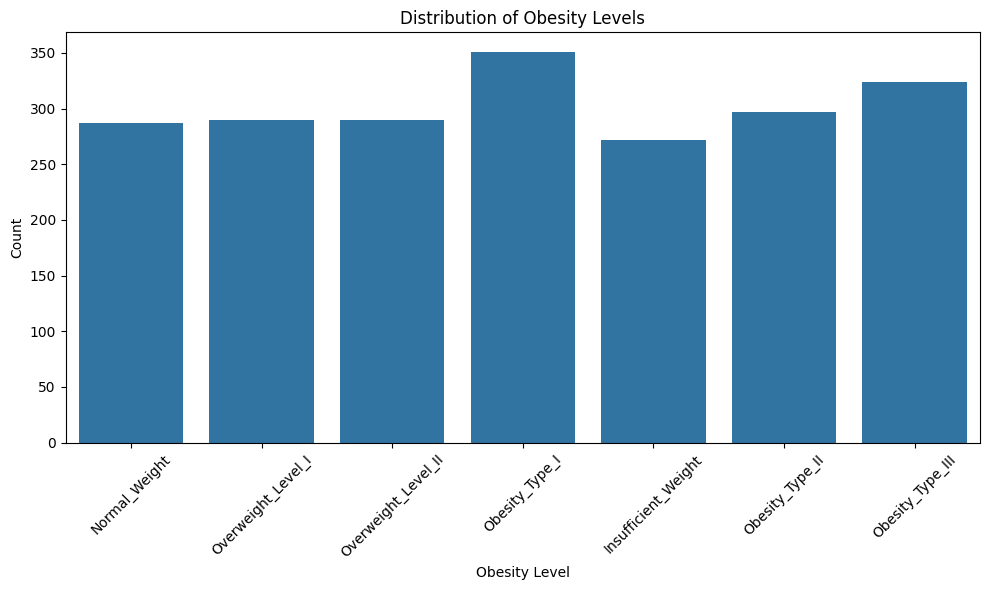

In [12]:
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Balanced distribution of obesity level. (Important to validate: Since there is signifcant part of the dataset that is synthetic)

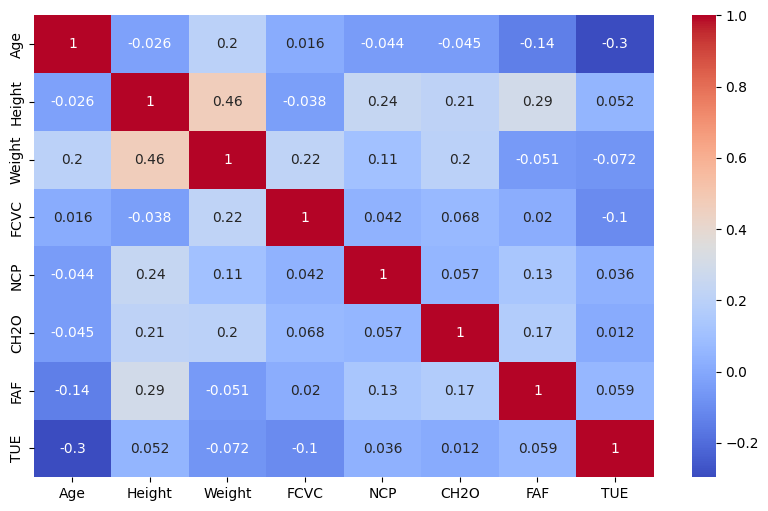

In [13]:
# explore any relationships between numeric types
# Select only the numeric columns from the dataset
numeric_data = obesity.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


Most corelation coffecients are small - indicating most variables are indepenant. This is important because it indicates no Multicollinearity. Possible makes it easier to identify effect on target variable Obesity Levels. 


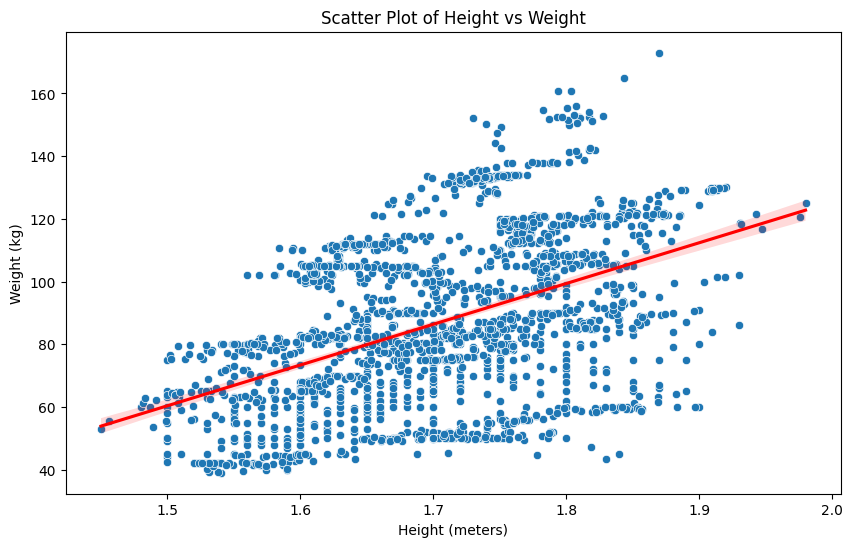

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=obesity)  # replace with your dataframe
sns.regplot(x='Height', y='Weight', data=obesity, scatter=False, color='red')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kg)')
plt.show()

Moderate relationship between weight and height

### Understanding relationship between family history and obesity level

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency


# Set pandas display options for wider output
pd.set_option('display.width', 1000)  # Adjust as needed
pd.set_option('display.max_columns', None)  # Show all columns

# Create a contingency table
contingency_table = pd.crosstab(obesity['family_history_with_overweight'], obesity['NObeyesdad'])
print(contingency_table)


# Perform Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}, p-value: {p.round(11)}")


NObeyesdad                      Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II
family_history_with_overweight                                                                                                                                
no                                              146            132               7                1                 0                  81                   18
yes                                             126            155             344              296               324                 209                  272
Chi-squared statistic: 621.9794353945297, p-value: 0.0


The table and chi-square p-value ~ 0.0 indicate there is strong evidence to reject the null hypothesis, suggesting that there is a significant association between family_history_with_overweight and NObesity (obesity levels).